In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sudokudetector.image import debug, render
from sudokudetector.Sudoku import Sudoku

game = Sudoku('dataset/image205.jpg')
# print(game.help)

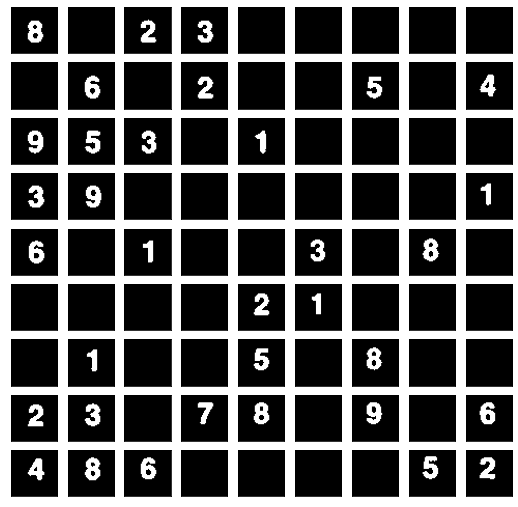

In [2]:
render(game.cells, (9, 9))

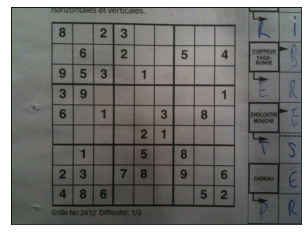

In [3]:
debug(game.load_image())

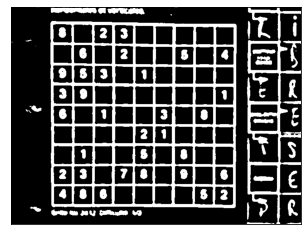

In [4]:
thresh =  cv2.cvtColor(game.load_image(), cv2.COLOR_BGR2GRAY)

thresh = game.adap_threshold(thresh)
# thresh = cv2.bitwise_not(thresh)
debug(thresh)

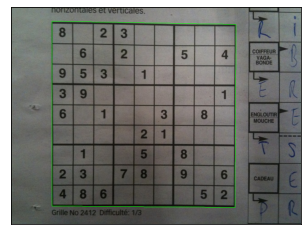

In [5]:
list_contours = game.create_contours(thresh)
output = game.load_image().copy()

# for c in list_contours:
#     cv2.drawContours(output, [c], -1, (0, 255, 0), 1)

table_contour = game.search_largest_square_contour(list_contours)
cv2.drawContours(output, [table_contour], -1, (0, 255, 0), 1)

debug(output)



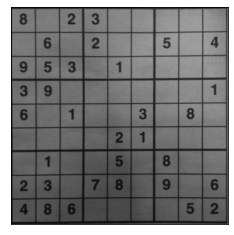

In [6]:
from imutils.perspective import four_point_transform

gray =  cv2.cvtColor(game.load_image(), cv2.COLOR_BGR2GRAY)
tranformed = four_point_transform(
            gray, table_contour.reshape(4, 2))
debug(tranformed)

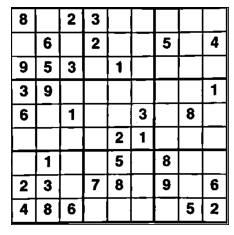

In [7]:
binary = game.convert_binary(tranformed)
debug(binary)

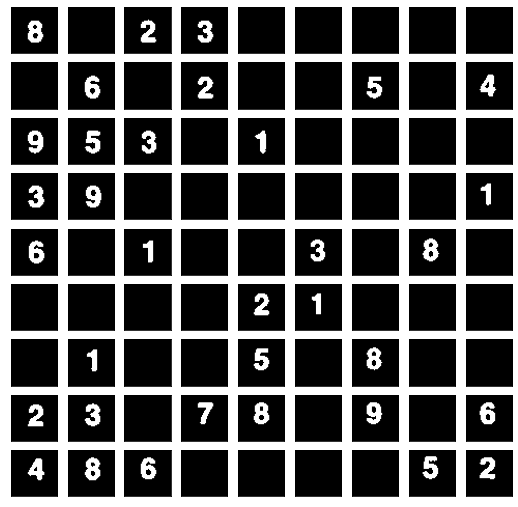

In [8]:
sudoku_splited = game.split_cells(binary)
render(sudoku_splited, (9, 9))